# Example of CHADA file generation using Chada Python class

Ignore this part

In [12]:
import sys

In [13]:
path = r"\\vm-stor-51\alle\Projekte Kunststoffe\RD\MA\Öffentliche_Projekte\2020-01-07_230007_H2020-CHARISMA_barton\Python\charisma-raman-spectrum-harmonization"
if path not in sys.path:
    sys.path.append(path)

#### Import Chada class

In [14]:
from chada import Chada

#### Specify file path

In [15]:
file = r"C:\Users\barton\Desktop\200218-17.wdf"

#### Create CHADA instance

In [16]:
C = Chada(file)

#### Display meta data

In [17]:
C.meta()

,value
original filepath,C:\Users\barton\Desktop\200218-17.wdf
native format,.wdf
laser wavelength,514.501
no. of accumulations,3
spectral unit,Counts
OEM software name,WiRE
OEM software version,"[5, 2, 0, 9499]"
minimum wavelength,102.77
maximum wavelength,3703.71
no. of channels,3190


#### Plot spectrum

The native file is always preserved, never altered, and never duplicated. Instead, methods such as "plot" pull the data from the native file inside the container each time.

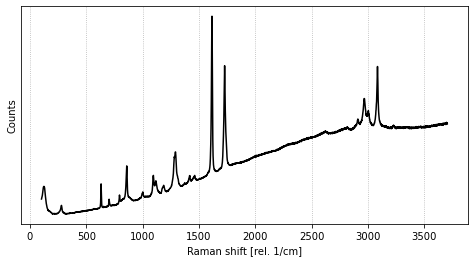

In [18]:
C.plot()

#### Find peaks & show positions

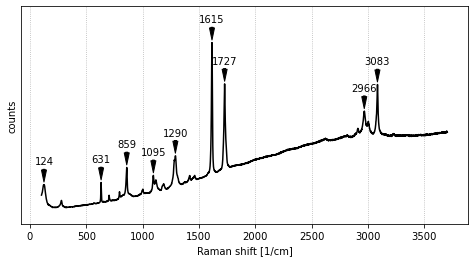

In [8]:
C.peaks(True)

CHADA object now has a "bands" attribute

In [9]:
C.bands

,peak pos [1/cm],peak_heights,prominences,left_bases,right_bases
0,124.789062,0.138841,0.063375,102.769531,313.140625
1,631.638672,0.151766,0.119658,313.140625,650.863281
2,859.189453,0.242811,0.176096,313.140625,920.322266
3,1095.613281,0.194785,0.090611,920.322266,1159.972656
4,1290.794922,0.313549,0.173357,313.140625,1347.218750
5,1615.630859,1.000000,0.785282,313.140625,1655.207031
6,1727.773438,0.749621,0.504528,1655.207031,1783.171875
7,2966.837891,0.583737,0.137056,1783.171875,3046.316406
8,3083.742188,0.745611,0.314901,1783.171875,3382.882812


#### Make baseline model using ALS algorithm

In [35]:
C.base()

In [20]:
import matplotlib.pyplot as plt 

Using pyplot, the baseline model can be shown together with the data

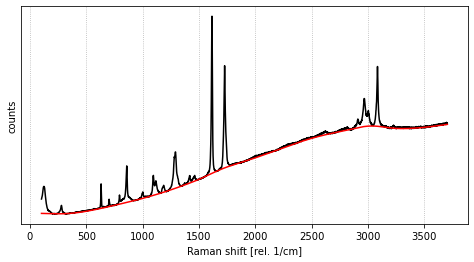

In [42]:
fig = plt.figure(figsize=[8,4])
plt.plot(C.data()[0], C.data()[1] + C.background_model, 'k')
plt.plot(C.data()[0], C.background_model, 'r')
plt.xlabel('Raman shift [rel. 1/cm]')
plt.ylabel('counts')
plt.grid(axis='x', which='both', linestyle=':')
plt.yticks([])
plt.show()

"plot" looks for an existing baseline model and subtracts if available. The raw data is preserved, and so is the original (native) file.

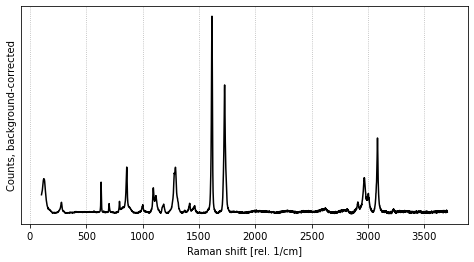

In [7]:
C.plot()

Of course, we should find the same peaks.

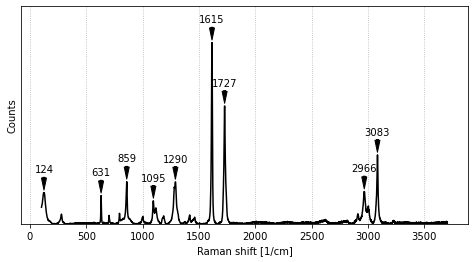

In [48]:
C.peaks(True)

In [10]:
C.bands

,peak pos [1/cm],peak_heights,prominences,left_bases,right_bases
0,124.789062,0.176840,0.079785,102.769531,328.875000
1,631.638672,0.160527,0.155890,328.875000,754.384766
2,859.189453,0.236889,0.232797,328.875000,1521.193359
3,1095.613281,0.132103,0.128882,952.021484,1226.312500
4,1290.794922,0.235874,0.232919,952.021484,1521.193359
5,1615.630859,1.000000,0.997621,1521.193359,2857.531250
6,1727.773438,0.652395,0.649207,1664.765625,2857.531250
7,2966.837891,0.183074,0.174641,2857.531250,3046.316406
8,3083.742188,0.383961,0.383031,2857.531250,3194.595703


We can list all current attributes of our chada instance C

In [52]:
dir(C)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'background_model',
 'bands',
 'base',
 'binary_data',
 'data',
 'filename',
 'meta',
 'metadata',
 'peaks',
 'plot',
 'readers',
 'save']

#### We can now save the CHADA file. It contains the native data file, metadata, plus all results so far.

In [11]:
C.save('CHADA_testfile')

Let's delete the original CHADA instance C and check that it's gone.

In [12]:
del C

In [13]:
C

NameError: name 'C' is not defined

#### Now load the CHADA file again from disk.

In [3]:
from chada import load

In [4]:
D = load('CHADA_testfile.cha')

Voilá, it's all there.

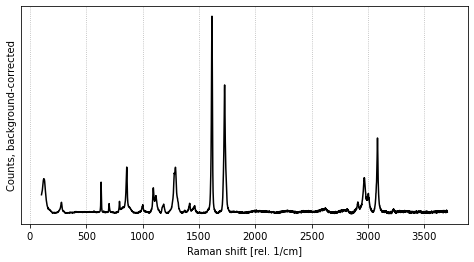

In [5]:
D.plot()

The CHADA file is not much larger than the native .wdf file (CHADA has the background model on top):

In [6]:
import os

In [9]:
os.stat(file).st_size

112102

In [10]:
os.stat('CHADA_testfile.cha').st_size

139956